# News Analysis

In [1]:
#importing library related to JSON file import and normalization
import json
from pandas.io.json import json_normalize
#loading JSON file
with open('../data/top-headlines.json',encoding='utf-8') as f:
  data = json.load(f)


{'status': 'ok', 'totalResults': 38, 'articles': [{'source': {'id': None, 'name': 'Tribuneindia.com'}, 'author': 'Tribune India', 'title': '16 home-bound workers sleeping on tracks killed - The Tribune India', 'description': 'Had dozed off after covering 45 km on foot | Mishap in Aurangabad | Victims aged 20-35 years | Railways orders probe', 'url': 'https://www.tribuneindia.com/news/nation/16-home-bound-workers-sleeping-on-tracks-killed-82410', 'urlToImage': 'https://cms.tribuneindia.com/gallary_content/2020/5/Desk/2020_5$largeimg_576808271.jpg', 'publishedAt': '2020-05-09T06:27:26Z', 'content': 'Tribune News Service\r\nMumbai, May 8\r\nSixteen migrant workers, all aged between 20-35 years, who were returning to their home state Madhya Pradesh on foot, were run over by a goods train in Aurangabad. Three others were injured. The mishap occurred between Bad… [+2408 chars]'}, {'source': {'id': None, 'name': 'Hindustantimes.com'}, 'author': 'Neeraj Chauhan | Edited by Meenakshi Ray', 'tit

In [2]:
import pandas as pd
pd.read_json ('../data/top-headlines.json')

,status,totalResults,articles
0,ok,38,"{'source': {'id': None, 'name': 'Tribuneindia...."
1,ok,38,"{'source': {'id': None, 'name': 'Hindustantime..."
2,ok,38,"{'source': {'id': None, 'name': 'Indianexpress..."
3,ok,38,"{'source': {'id': None, 'name': 'Newseverythin..."
4,ok,38,"{'source': {'id': 'the-hindu', 'name': 'The Hi..."
5,ok,38,"{'source': {'id': 'the-times-of-india', 'name'..."
6,ok,38,"{'source': {'id': None, 'name': 'Indiatvnews.c..."
7,ok,38,"{'source': {'id': None, 'name': 'Hindustantime..."
8,ok,38,"{'source': {'id': None, 'name': 'Indiagonevira..."
9,ok,38,"{'source': {'id': None, 'name': 'Firstpost.com..."


In [3]:
import json
with open('../data/top-headlines-old.json',encoding='utf-8') as f:
  d = json.load(f)
#normalizing JASON file
df = json_normalize(d['articles'])
#display(df)
#feching only title,content and discription from JSON documents
new1 = df[['title']].copy()
new2 = df[['content']].copy()
new3 = df[['description']].copy()
#merging all these three column in one row
df['tile+content']= df["title"].astype(str) +" "+ df["content"]
df['total']= df["tile+content"].astype(str) +" "+ df["description"]
new4 = df[['total']].copy()
#removing null rows
new4=new4.dropna()
#dropping duplicate row if any
final = new4.drop_duplicates('total')
display(final)

,total
0,Hope for slowing spread of coronavirus in Chin...
1,Uddhav’s new allies ask him to review stand on...
2,Samsung Galaxy S20 Ultra Unboxing and Camera T...
3,"India vs Australia, FIH Hockey Pro League 2020..."
4,Activists write open letter against 'Namaste T...
5,Berkshire Hathaway 100% ready for my departure...
6,OECD says coronavirus is another reason to boo...
7,NASA Is Designing a Venus Rover Concept and Wa...
9,Russia Behind Massive Coronavirus Disinformati...
11,TCM aids treatments of over 60000 COVID-19 cas...


# K-mean clustering

In [4]:
#importing sklearn,TFID and pands library as per need
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#importing KMEANS libarary from sklearn
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans
#creating TFID objectfor vectorize news articles and fitting them
vec = TfidfVectorizer()
vec.fit(final.total.values)
data = pd.DataFrame(vec.transform(final.total.values).toarray(), columns=sorted(vec.vocabulary_.keys()))
#passing english punctuations and unwanted words as a stop words and removing it from articles
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv','anywh', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'plea', 'somewh']
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
vec1 = TfidfVectorizer(stop_words=stop_words)
#stop all english words
vec2 = TfidfVectorizer(stop_words="english")
#saving and transformmming articles and save it as a fetures
vec2.fit(final.total.values)
features = vec2.transform(final.total.values)
print(features)

  (0, 486)	0.15897947294896372
  (0, 469)	0.1391533136316553
  (0, 452)	0.1391533136316553
  (0, 418)	0.2783066272633106
  (0, 406)	0.31795894589792745
  (0, 404)	0.15897947294896372
  (0, 393)	0.15897947294896372
  (0, 359)	0.15897947294896372
  (0, 302)	0.15897947294896372
  (0, 297)	0.09119338651482058
  (0, 295)	0.10526027041458373
  (0, 254)	0.15897947294896372
  (0, 211)	0.15897947294896372
  (0, 210)	0.15897947294896372
  (0, 188)	0.4174599408949659
  (0, 130)	0.1391533136316553
  (0, 123)	0.15897947294896372
  (0, 119)	0.34252592069725574
  (0, 113)	0.12508642973189216
  (0, 111)	0.22835061379817048
  (0, 93)	0.2783066272633106
  (0, 86)	0.1391533136316553
  (0, 57)	0.15897947294896372
  (0, 56)	0.1391533136316553
  (0, 7)	0.12508642973189216
  :	:
  (17, 383)	0.36217802280986866
  (17, 369)	0.09054450570246717
  (17, 366)	0.09054450570246717
  (17, 358)	0.09054450570246717
  (17, 332)	0.09054450570246717
  (17, 331)	0.2716335171074015
  (17, 329)	0.09054450570246717
  (17, 314

In [5]:
#feature reduction using PCA libarary and converting multi-dimenstional aray to three dimension array
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features.toarray())
print(reduced_features)

[[-0.52599389  0.42221821 -0.05073203]
 [ 0.51468763  0.44517814  0.20072804]
 [-0.39203862  0.23207805 -0.02692274]
 [ 0.2351081   0.05603163 -0.44592512]
 [ 0.55176114  0.41415643  0.19265277]
 [-0.01748767 -0.23868334 -0.06187445]
 [-0.05419291  0.11689997  0.16331219]
 [-0.04294835 -0.3141002   0.00726072]
 [-0.24097506  0.18577274  0.12430614]
 [-0.40117973  0.22804847 -0.04098506]
 [ 0.19928396 -0.05688492 -0.39672796]
 [ 0.1645542  -0.07329175 -0.21146069]
 [-0.04681124 -0.21724422 -0.0157639 ]
 [-0.02401591 -0.1353817   0.04929563]
 [ 0.04670692 -0.30591607  0.45243107]
 [ 0.05105436 -0.3091869   0.4576789 ]
 [-0.13003546 -0.23840758  0.02435995]
 [ 0.11252253 -0.21128696 -0.42163345]]


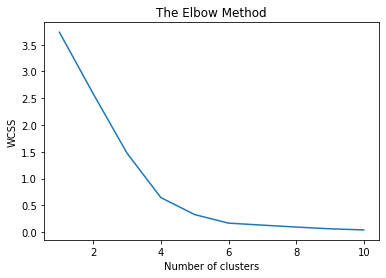

In [6]:
#decising number of centroids for KMeans clustring using elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[-0.10421855  0.02132979  0.07524796]
 [ 0.26066064  0.03828379 -0.08999076]
 [-0.03855132 -0.24286412  0.10456626]
 [-0.43973741  0.29411491 -0.03954661]]


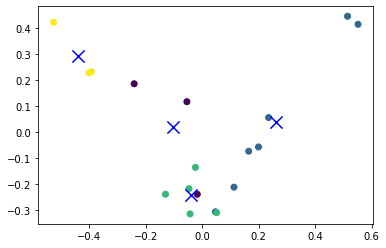

In [7]:
#here after &#39;4&#39; graph beacomes almost linear so number of cluster is 4
#creating KMEANS object and fitting the transform
cls = KMeans(n_clusters=4)
cls.fit(features)
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
#plotting kmeans clusters
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
print(reduced_cluster_centers)

In [8]:
#printing results of each atricles
predicted=pd.DataFrame(final)
predicted['predicted_cluster']=cls.labels_
predicted

,total,predicted_cluster
0,Hope for slowing spread of coronavirus in Chin...,3
1,Uddhav’s new allies ask him to review stand on...,1
2,Samsung Galaxy S20 Ultra Unboxing and Camera T...,3
3,"India vs Australia, FIH Hockey Pro League 2020...",1
4,Activists write open letter against 'Namaste T...,1
5,Berkshire Hathaway 100% ready for my departure...,0
6,OECD says coronavirus is another reason to boo...,0
7,NASA Is Designing a Venus Rover Concept and Wa...,2
9,Russia Behind Massive Coronavirus Disinformati...,0
11,TCM aids treatments of over 60000 COVID-19 cas...,3


# DBScan Clustering

         P1        P2
0 -0.168965  0.602977
1  0.710702  0.088433
2 -0.119373  0.537727
3  0.028805  0.029269
4  0.725121  0.077661
[-1 -1 -1 -1 -1 -1  1  0 -1 -1 -1  1  1  0  0 -1  0  0]


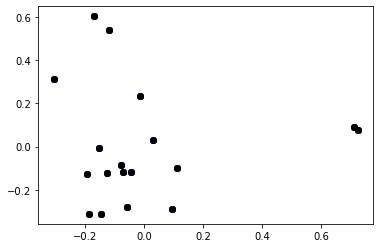

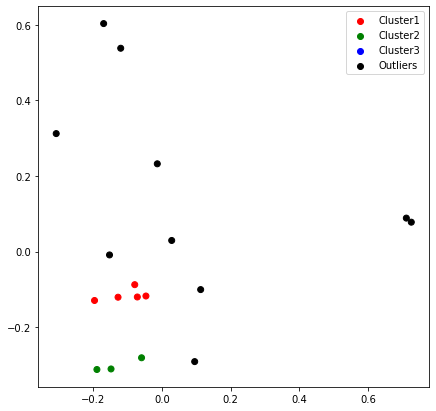

In [12]:
#now employing DBSCAN clustring for the same, for that imporing related library
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
#scaling down the data and creating its dataframes
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
#again reducing dimenstionality and creating two principle columns
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())
#creating DBSCAN object
db_default = DBSCAN(eps = 0.100, min_samples = 3).fit(X_principal)
labels = db_default.labels_ 
print(labels)
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
# Plotting P1 on the X-Axis and P2 on the Y-Axis  
plt.figure(figsize =(7, 7)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, k), ('Cluster1', 'Cluster2', 'Cluster3', 'Outliers')) 
plt.show() 

In [13]:
#printing results of each atricles
predicted1=pd.DataFrame(final)
predicted1['predicted_cluster']=db_default.labels_
predicted1

,total,predicted_cluster
0,Hope for slowing spread of coronavirus in Chin...,-1
1,Uddhav’s new allies ask him to review stand on...,-1
2,Samsung Galaxy S20 Ultra Unboxing and Camera T...,-1
3,"India vs Australia, FIH Hockey Pro League 2020...",-1
4,Activists write open letter against 'Namaste T...,-1
5,Berkshire Hathaway 100% ready for my departure...,-1
6,OECD says coronavirus is another reason to boo...,1
7,NASA Is Designing a Venus Rover Concept and Wa...,0
9,Russia Behind Massive Coronavirus Disinformati...,-1
11,TCM aids treatments of over 60000 COVID-19 cas...,-1
